<a href="https://colab.research.google.com/github/mariduff/DATASCIENCE_BI/blob/main/notebooks/ETL_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from pathlib import Path
import pandas as pd

BASE_DIR = Path("/content/drive/MyDrive/TFM")
DATA_DIR = BASE_DIR / "data"
PROCESSED_DIR = DATA_DIR / "processed"

# Ruta del archivo con los totales por centro
RUTA_TOTALES = PROCESSED_DIR / "TTT_totales_por_centro.xlsx"


In [4]:
df = pd.read_excel(RUTA_TOTALES)

print(f"✅ Dataset cargado: {df.shape}")
df.head()


✅ Dataset cargado: (5348, 33)


,MesAno,CD_CENTRO,TEMPORALIDAD,PUESTO,ASISTENCIAL,No. Empleado,FTE Contratación,FTE Sin Absentismo,FTE Absentismo,Plantilla Total Absentismo,...,RdE,Vacaciones,Vacaciones año ant.,FTE reemplazo Vacaciones,CAPACIDAD,Ocupacion Media,Ocupacion Media Res,Ocupacion Media CD,Ocupacion facturada,RESIDENCIAL
0,2023-01-01,CENTRO1,Total,NaN,NaN,3,2.125081,2.108941,0.016140,0.048398,...,NaN,0.032258,NaN,NaN,103.0,NaN,NaN,NaN,NaN,RESIDENCIAL
1,2023-01-01,CENTRO2,Total,NaN,NaN,115,89.366257,76.512255,12.854002,17.249221,...,1.675085,0.806450,2.469740,0.580644,178.0,151.709677,151.709677,NaN,151.261372,RESIDENCIAL
2,2023-01-01,CENTRO3,Total,NaN,NaN,158,147.842873,124.306883,23.535990,30.386379,...,NaN,5.237489,1.290320,0.232256,128.0,103.548387,96.000000,7.548387,96.000000,RESIDENCIAL
3,2023-01-01,CENTRO4,Total,NaN,NaN,95,72.016281,66.035838,5.980443,8.417673,...,NaN,NaN,2.296105,2.319318,140.0,134.322581,119.580645,14.741935,133.725041,RESIDENCIAL
4,2023-01-01,CENTRO5,Total,NaN,NaN,112,92.160319,78.230852,13.929467,14.530442,...,NaN,0.230008,0.225806,NaN,183.0,130.903226,130.387097,0.516129,132.465999,RESIDENCIAL


In [5]:
# Tipos de datos
print("\n📋 Tipos de datos:")
print(df.dtypes)

# Nulos por columna
print("\n🕳️ Valores nulos:")
print(df.isnull().sum().sort_values(ascending=False))

# Porcentaje de nulos
print("\n📊 Porcentaje de nulos:")
porcentaje_nulos = df.isnull().mean() * 100
display(porcentaje_nulos.sort_values(ascending=False))

# Duplicados
print(f"\n📎 Filas duplicadas: {df.duplicated().sum()}")



📋 Tipos de datos:
MesAno                        datetime64[ns]
CD_CENTRO                             object
TEMPORALIDAD                          object
PUESTO                               float64
ASISTENCIAL                          float64
No. Empleado                           int64
FTE Contratación                     float64
FTE Sin Absentismo                   float64
FTE Absentismo                       float64
Plantilla Total Absentismo           float64
Acumulación Lactancia                float64
AT / EP                              float64
Ausencia NO justificada              float64
Días Asuntos Propios                 float64
EC / ANL                             float64
Horas Comité Seguridad               float64
Horas sindicales                     float64
Huelga Parcial                       float64
Huelga Total                         float64
Maternidad                           float64
Paternidad                           float64
Permiso retribuido                  

,0
ASISTENCIAL,100.000000
PUESTO,100.000000
Horas Comité Seguridad,98.821990
Huelga Total,98.821990
Huelga Parcial,98.541511
Paternidad,90.575916
Acumulación Lactancia,85.134630
Ausencia NO justificada,72.830965
RdE,69.596111
Maternidad,62.471952



📎 Filas duplicadas: 0


Vamos a proceder a eliminar las columnas que están todas sus filas vacías -> ASISTENCIAL y PUESTO

In [6]:
# Eliminar columnas 'ASISTENCIAL' y 'PUESTO'
df.drop(columns=["ASISTENCIAL", "PUESTO"], inplace=True)

print("Columnas actuales:")
print(df.columns)


Columnas actuales:
Index(['MesAno', 'CD_CENTRO', 'TEMPORALIDAD', 'No. Empleado',
       'FTE Contratación', 'FTE Sin Absentismo', 'FTE Absentismo',
       'Plantilla Total Absentismo', 'Acumulación Lactancia', 'AT / EP',
       'Ausencia NO justificada', 'Días Asuntos Propios', 'EC / ANL',
       'Horas Comité Seguridad', 'Horas sindicales', 'Huelga Parcial',
       'Huelga Total', 'Maternidad', 'Paternidad', 'Permiso retribuido',
       'Permiso sin sueldo', 'RdE', 'Vacaciones', 'Vacaciones año ant.',
       'FTE reemplazo Vacaciones', 'CAPACIDAD', 'Ocupacion Media',
       'Ocupacion Media Res', 'Ocupacion Media CD', 'Ocupacion facturada',
       'RESIDENCIAL'],
      dtype='object')


Ahora, por lógica: tampoco nos sirven las columnas TEMPORALIDAD y RESIDENCIAL que siempre tienen el mismo valor (sí mismo).

In [8]:
# Eliminar columnas adicionales
df.drop(columns=["TEMPORALIDAD", "RESIDENCIAL"], inplace=True)

# Confirmar eliminación
print("Columnas actuales:")
print(df.columns)


Columnas actuales:
Index(['MesAno', 'CD_CENTRO', 'No. Empleado', 'FTE Contratación',
       'FTE Sin Absentismo', 'FTE Absentismo', 'Plantilla Total Absentismo',
       'Acumulación Lactancia', 'AT / EP', 'Ausencia NO justificada',
       'Días Asuntos Propios', 'EC / ANL', 'Horas Comité Seguridad',
       'Horas sindicales', 'Huelga Parcial', 'Huelga Total', 'Maternidad',
       'Paternidad', 'Permiso retribuido', 'Permiso sin sueldo', 'RdE',
       'Vacaciones', 'Vacaciones año ant.', 'FTE reemplazo Vacaciones',
       'CAPACIDAD', 'Ocupacion Media', 'Ocupacion Media Res',
       'Ocupacion Media CD', 'Ocupacion facturada'],
      dtype='object')


Ahora, eliminamos las columnas que tienen más de un 65% de nulos

In [9]:

columnas_nulas_65 = [
    "Horas Comité Seguridad",
    "Huelga Total",
    "Huelga Parcial",
    "Paternidad",
    "Acumulación Lactancia",
    "Ausencia NO justificada",
    "RdE"
]

# Eliminarlas del DataFrame
df.drop(columns=columnas_nulas_65, inplace=True)




Vemos la cantidad de nulos restantes para analizar:

In [10]:
nulos_restantes = df.isnull().mean() * 100
nulos_restantes = nulos_restantes[nulos_restantes > 0].sort_values(ascending=False)

nulos_restantes


,0
Maternidad,62.471952
Vacaciones año ant.,55.815258
Ocupacion Media CD,50.785340
Horas sindicales,45.718025
Permiso sin sueldo,44.035153
AT / EP,39.547494
FTE reemplazo Vacaciones,22.737472
Ocupacion Media Res,17.931937
Días Asuntos Propios,16.922214
Permiso retribuido,16.305161


Con respecto a las columnas de ocupación, por conocimiento del negocio sé que no aportan, lo primero: ocupación residencial CD no lo quiero ya que no me quiero centrar en las plazas ocupadas por el centro de día del centro residencial, quiero basarlo solo en residencial, por otro lado la ocupacion facturada es muy similar a la ocupacion media res, por tanto resultaría también redundante. Pero quiero ver por análisis de correlación o algo así que no sirven, y evidenciarlo de manera académica y no por conocimiento del negocio: Para ello decido hacer análisis de correlacion

In [11]:
cols_ocupacion = [
    "Ocupacion Media Res",
    "Ocupacion Media",
    "Ocupacion Media CD",
    "Ocupacion facturada"
]

# MATRIZ CORRELACION
df[cols_ocupacion].corr()



,Ocupacion Media Res,Ocupacion Media,Ocupacion Media CD,Ocupacion facturada
Ocupacion Media Res,1.000000,0.942687,-0.269550,0.953491
Ocupacion Media,0.942687,1.000000,-0.133152,0.973847
Ocupacion Media CD,-0.269550,-0.133152,1.000000,-0.085192
Ocupacion facturada,0.953491,0.973847,-0.085192,1.000000


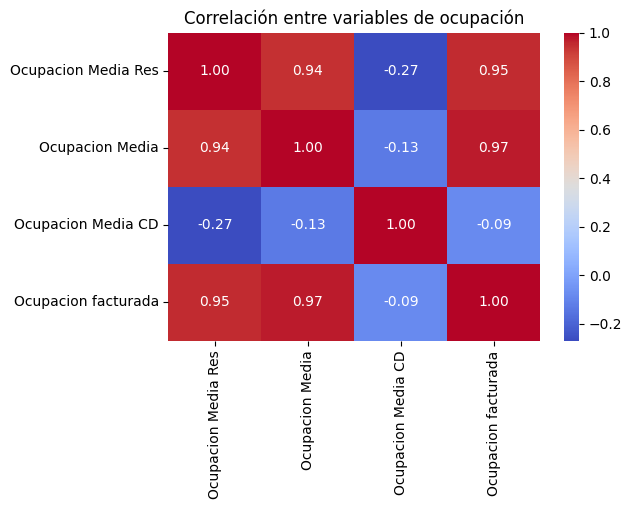

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df[cols_ocupacion].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables de ocupación")
plt.show()


Esto evidencia mi análisis anterior. Ahora vamos a pasar a ver la correlación del resto de variables, por si hay algo que se nos escapa

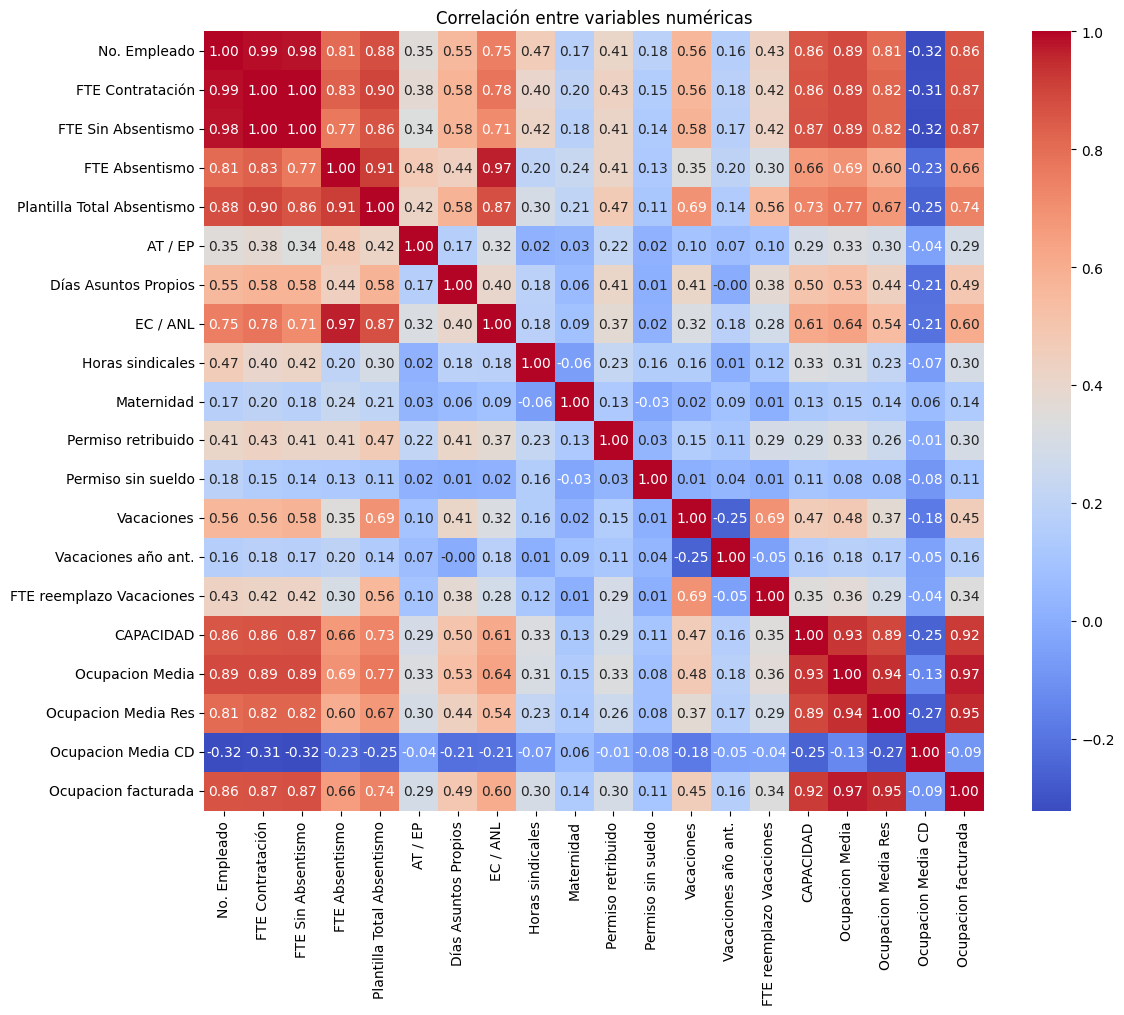

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# solo variables numéricas
df_numericas = df.select_dtypes(include=["float64", "int64"])

# MATRIZ
matriz_corr = df_numericas.corr()

# Gráfica
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlación entre variables numéricas")
plt.tight_layout()
plt.show()


Creamos una columna calculada que sea ocupacion media res / capacidad y eliminamos esas y resto de variables de ocupacion

In [15]:
# Crear nueva variable de tasa de ocupación
df["Tasa_Ocupacion"] = df["Ocupacion Media Res"] / df["CAPACIDAD"]

# Eliminar columnas de ocupación redundantes
columnas_ocupacion_eliminar = [
    "Ocupacion Media",
    "Ocupacion Media CD",
    "Ocupacion facturada",
    "Ocupacion Media Res",
    "CAPACIDAD"
]

df.drop(columns=columnas_ocupacion_eliminar, inplace=True)


Conservamos FTE Contratacion y eliminamos No. empleados

In [16]:
df.drop(columns=["No. Empleado"], inplace=True)


Eliminamos también FTE Sin Absentismo, ya que se explica a partir de FTE Contratacion y FTE Absentismo

In [17]:
df.drop(columns=["FTE Sin Absentismo"], inplace=True)


Vemos como queda el dataset despues de todos estos cambios:

In [18]:
print(f"Dimensiones actuales: {df.shape}")
df.head()


Dimensiones actuales: (5348, 16)


,MesAno,CD_CENTRO,FTE Contratación,FTE Absentismo,Plantilla Total Absentismo,AT / EP,Días Asuntos Propios,EC / ANL,Horas sindicales,Maternidad,Permiso retribuido,Permiso sin sueldo,Vacaciones,Vacaciones año ant.,FTE reemplazo Vacaciones,Tasa_Ocupacion
0,2023-01-01,CENTRO1,2.125081,0.016140,0.048398,NaN,NaN,0.016140,NaN,NaN,NaN,NaN,0.032258,NaN,NaN,NaN
1,2023-01-01,CENTRO2,89.366257,12.854002,17.249221,3.129026,0.409353,6.637395,0.032258,1.096772,0.258064,0.078628,0.806450,2.469740,0.580644,0.852302
2,2023-01-01,CENTRO3,147.842873,23.535990,30.386379,2.068340,NaN,17.854754,NaN,1.999996,0.322580,1.032256,5.237489,1.290320,0.232256,0.750000
3,2023-01-01,CENTRO4,72.016281,5.980443,8.417673,1.415314,0.028225,3.690154,NaN,0.874975,0.112900,NaN,NaN,2.296105,2.319318,0.854147
4,2023-01-01,CENTRO5,92.160319,13.929467,14.530442,1.150253,0.064516,12.779214,NaN,NaN,0.080645,NaN,0.230008,0.225806,NaN,0.712498


In [19]:
df.columns.tolist()


['MesAno',
 'CD_CENTRO',
 'FTE Contratación',
 'FTE Absentismo',
 'Plantilla Total Absentismo',
 'AT / EP',
 'Días Asuntos Propios',
 'EC / ANL',
 'Horas sindicales',
 'Maternidad',
 'Permiso retribuido',
 'Permiso sin sueldo',
 'Vacaciones',
 'Vacaciones año ant.',
 'FTE reemplazo Vacaciones',
 'Tasa_Ocupacion']

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   MesAno                      5348 non-null   datetime64[ns]
 1   CD_CENTRO                   5348 non-null   object        
 2   FTE Contratación            5295 non-null   float64       
 3   FTE Absentismo              5062 non-null   float64       
 4   Plantilla Total Absentismo  5175 non-null   float64       
 5   AT / EP                     3233 non-null   float64       
 6   Días Asuntos Propios        4443 non-null   float64       
 7   EC / ANL                    4980 non-null   float64       
 8   Horas sindicales            2903 non-null   float64       
 9   Maternidad                  2007 non-null   float64       
 10  Permiso retribuido          4476 non-null   float64       
 11  Permiso sin sueldo          2993 non-null   float64     

Eliminamos las filas donde tasa_ocupacion es nulo, ya que los centros a analizar necesitamos que tengan ocupación.

In [ ]:
df[df["Tasa_Ocupacion"].isna() | (df["Tasa_Ocupacion"] == 0)]


,MesAno,CD_CENTRO,FTE Contratación,FTE Absentismo,Plantilla Total Absentismo,AT / EP,Días Asuntos Propios,EC / ANL,Horas sindicales,Maternidad,Permiso retribuido,Permiso sin sueldo,Vacaciones,Vacaciones año ant.,FTE reemplazo Vacaciones,Tasa_Ocupacion
0,2023-01-01,CENTRO1,2.125081,0.016140,0.048398,NaN,NaN,0.016140,NaN,NaN,NaN,NaN,0.032258,NaN,NaN,NaN
6,2023-01-01,CENTRO7,8.734898,0.565708,0.987043,NaN,0.100805,0.565708,NaN,NaN,0.024193,NaN,0.066666,0.229671,0.612896,NaN
8,2023-01-01,CENTRO10,7.365689,0.499999,1.009667,NaN,0.032258,0.499999,NaN,NaN,NaN,NaN,0.477410,NaN,NaN,NaN
9,2023-01-01,CENTRO11,25.797547,0.249984,0.637725,NaN,NaN,0.249984,NaN,NaN,NaN,NaN,0.096774,0.290967,0.399188,NaN
15,2023-01-01,CENTRO18,11.279029,0.241920,0.969289,NaN,NaN,NaN,NaN,NaN,0.064516,NaN,0.008603,0.654250,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,2025-06-01,CENTRO86,11.949900,1.066656,1.637416,NaN,0.041600,1.066656,NaN,NaN,NaN,NaN,0.529160,NaN,NaN,NaN
5262,2025-06-01,CENTRO115,7.079033,0.199980,0.754139,NaN,0.116665,NaN,NaN,0.19998,NaN,NaN,0.437494,NaN,0.266664,NaN
5278,2025-06-01,CENTRO146,19.974641,2.024980,3.569927,NaN,0.102499,2.024980,0.056249,NaN,0.020833,NaN,1.365366,NaN,1.283985,NaN
5298,2025-06-01,CENTRO176,18.368759,1.645813,3.149139,NaN,0.278122,1.624980,0.099999,NaN,0.259166,0.020833,0.866039,NaN,NaN,NaN


In [22]:
df = df[~(df["Tasa_Ocupacion"].isna() | (df["Tasa_Ocupacion"] == 0))].copy()


Vemos también gráficamente como queda la cantidad de nulos:

/tmp/ipython-input-4091882176.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_no_nulos.values, y=porcentaje_no_nulos.index, palette="viridis")


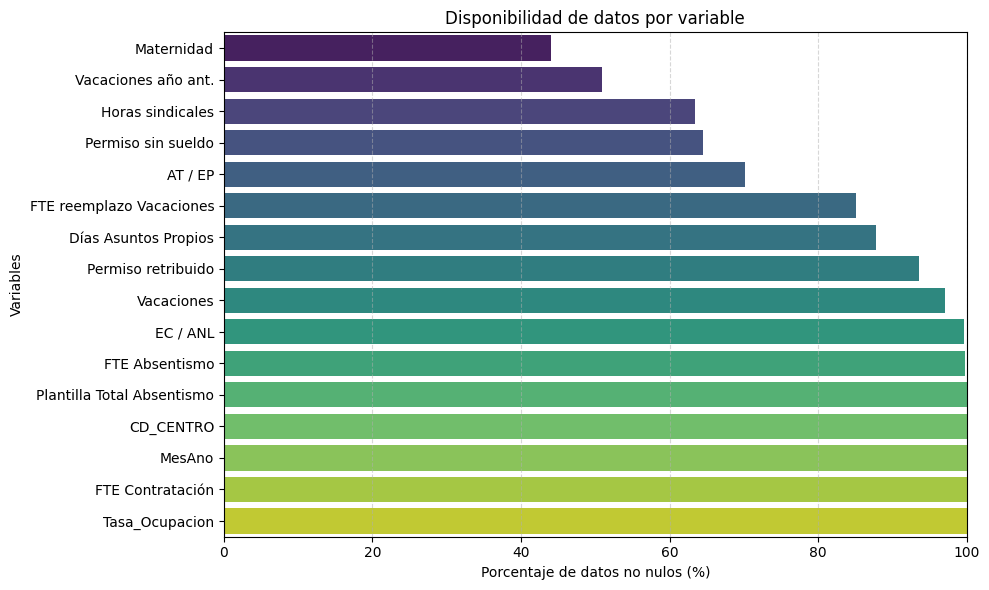

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular porcentaje de datos no nulos por columna
porcentaje_no_nulos = df.notnull().mean().sort_values(ascending=True) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentaje_no_nulos.values, y=porcentaje_no_nulos.index, palette="viridis")

plt.xlabel("Porcentaje de datos no nulos (%)")
plt.ylabel("Variables")
plt.title("Disponibilidad de datos por variable")
plt.xlim(0, 100)
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


Vamos a estudiar su varianza para analizar si alguna variable más nos podría sobrar

In [25]:
df.select_dtypes(include=["float64", "int64"]).std().sort_values()


,0
Tasa_Ocupacion,0.142154
Horas sindicales,0.364471
Días Asuntos Propios,0.396937
Permiso sin sueldo,0.556864
Permiso retribuido,0.635062
Maternidad,0.664970
Vacaciones año ant.,0.819603
AT / EP,0.969364
FTE reemplazo Vacaciones,3.066987
Vacaciones,3.568746


Tras ver esto, se podría eliminar Tasa_Ocupacion por tener poca desviacion estandar (0.14) pero creo que conceptualmente es interesante en nuestro estudio. Con respecto a Horas Sindicales y Dias Asuntos propios podemos dejarlas o eliminarlas para simplificar modelo. Analizamos el coeficiente de variación:

In [26]:
cv = df.select_dtypes(include=["float64", "int64"]).std() / df.select_dtypes(include=["float64", "int64"]).mean()
cv.sort_values()


,0
Tasa_Ocupacion,0.170871
FTE Contratación,0.355047
Plantilla Total Absentismo,0.485314
FTE Absentismo,0.547726
EC / ANL,0.590918
Maternidad,0.672995
Días Asuntos Propios,0.725981
Vacaciones,0.772621
AT / EP,0.850527
Horas sindicales,0.910265


Horas sindicales tiene una alta repetición. Vacaciones año anterior ya contenía muchos nulos, podemos eliminarla. Permiso sin sueldo tiene alta varianza pero muy pocos datos.

In [27]:
df.drop(columns=["Vacaciones año ant."], inplace=True)


In [28]:
print(f"Dimensiones actuales: {df.shape}")
df.head()

Dimensiones actuales: (4389, 15)


,MesAno,CD_CENTRO,FTE Contratación,FTE Absentismo,Plantilla Total Absentismo,AT / EP,Días Asuntos Propios,EC / ANL,Horas sindicales,Maternidad,Permiso retribuido,Permiso sin sueldo,Vacaciones,FTE reemplazo Vacaciones,Tasa_Ocupacion
1,2023-01-01,CENTRO2,89.366257,12.854002,17.249221,3.129026,0.409353,6.637395,0.032258,1.096772,0.258064,0.078628,0.806450,0.580644,0.852302
2,2023-01-01,CENTRO3,147.842873,23.535990,30.386379,2.068340,NaN,17.854754,NaN,1.999996,0.322580,1.032256,5.237489,0.232256,0.750000
3,2023-01-01,CENTRO4,72.016281,5.980443,8.417673,1.415314,0.028225,3.690154,NaN,0.874975,0.112900,NaN,NaN,2.319318,0.854147
4,2023-01-01,CENTRO5,92.160319,13.929467,14.530442,1.150253,0.064516,12.779214,NaN,NaN,0.080645,NaN,0.230008,NaN,0.712498
5,2023-01-01,CENTRO6,94.871355,8.146896,9.561732,0.677418,0.189032,6.308190,NaN,NaN,0.290322,NaN,0.612902,0.096774,0.814076


Se va a crear un nuevo cálculo que mida el absentismo relativo, así es más justo entre diferentes tamaños de centros o con diferente número de empleados.

In [29]:
df["Absentismo_relativo"] = df["FTE Absentismo"] / df["FTE Contratación"]


In [30]:
df["Absentismo_relativo"] = df["Absentismo_relativo"].round(4)


In [31]:
print(f"Dimensiones actuales: {df.shape}")
df.head()

Dimensiones actuales: (4389, 16)


,MesAno,CD_CENTRO,FTE Contratación,FTE Absentismo,Plantilla Total Absentismo,AT / EP,Días Asuntos Propios,EC / ANL,Horas sindicales,Maternidad,Permiso retribuido,Permiso sin sueldo,Vacaciones,FTE reemplazo Vacaciones,Tasa_Ocupacion,Absentismo_relativo
1,2023-01-01,CENTRO2,89.366257,12.854002,17.249221,3.129026,0.409353,6.637395,0.032258,1.096772,0.258064,0.078628,0.806450,0.580644,0.852302,0.1438
2,2023-01-01,CENTRO3,147.842873,23.535990,30.386379,2.068340,NaN,17.854754,NaN,1.999996,0.322580,1.032256,5.237489,0.232256,0.750000,0.1592
3,2023-01-01,CENTRO4,72.016281,5.980443,8.417673,1.415314,0.028225,3.690154,NaN,0.874975,0.112900,NaN,NaN,2.319318,0.854147,0.0830
4,2023-01-01,CENTRO5,92.160319,13.929467,14.530442,1.150253,0.064516,12.779214,NaN,NaN,0.080645,NaN,0.230008,NaN,0.712498,0.1511
5,2023-01-01,CENTRO6,94.871355,8.146896,9.561732,0.677418,0.189032,6.308190,NaN,NaN,0.290322,NaN,0.612902,0.096774,0.814076,0.0859


Se crea también la variable EC / ANL relativa, para eliminar sesgo de tamaños entre centros

In [36]:
df["EC_ANL_relativo"] = df["EC / ANL"] / df["FTE Contratación"]


Como tenemos los datos evolutivos, me gustaría hacer un análisis temporal para ver como se comportan las variables

<Axes: title={'center': 'Absentismo medio mensual'}, xlabel='MesAno'>

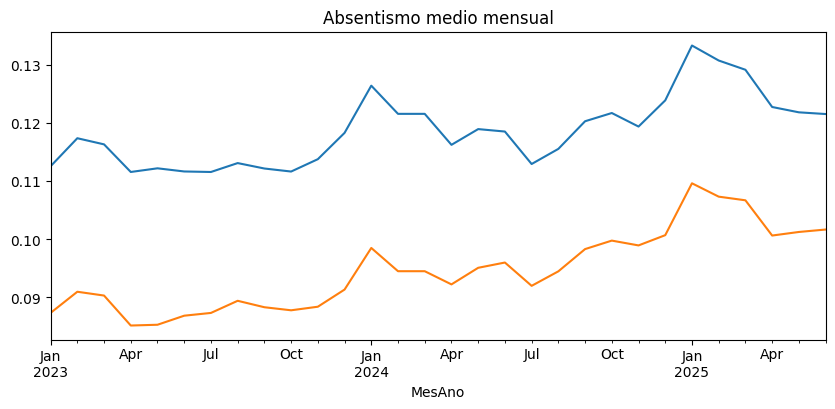

In [39]:
df.groupby("MesAno")["Absentismo_relativo"].mean().plot(figsize=(10, 4), title="Absentismo medio mensual")
df.groupby("MesAno")["EC_ANL_relativo"].mean().plot(figsize=(10, 4))

En el anterior gráfico se puede visualizar que la variable de EC / ANL (línea amarilla) al ser la más repetida, presenta el mismo comportamiento que el total absentismo, como es obvio.
Se visualiza además que ha habido un crecimiento del % de bajas de este tipo a medida que han avanzado los meses, incluso se puede ver ya estacionalidad en los meses de enero (fin de año - navidades).

Vamos a estudiar su estacionalidad más a fondo y vemos en una gráfica en qué mes se producen más:

<Axes: title={'center': 'Estacionalidad mensual de EC/ANL relativo'}, xlabel='Mes'>

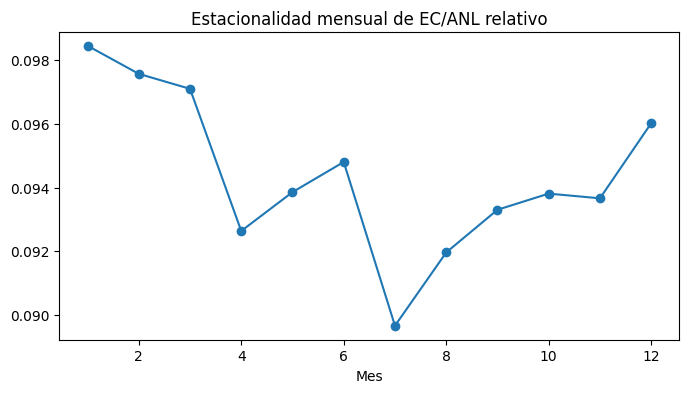

In [40]:
df["Mes"] = df["MesAno"].dt.month

df.groupby("Mes")["EC_ANL_relativo"].mean().plot(kind='line', marker='o', title="Estacionalidad mensual de EC/ANL relativo", figsize=(8,4))


Podemos ver que en los meses de invierno (noviembre - marzo) se producen más bajas de este tipo, esto podría venir dado por la cantidad de resfriados, gripes, etc que pillamos más en los meses de invierno y también por las navidades, mucha gente puede aprovechar los días entre festivos para darse una baja por EC.
Podemos ver que también hay un pico en el mes de junio.

Vamos a analizar ahora qué cantidad de bajas de EC hay por centro:

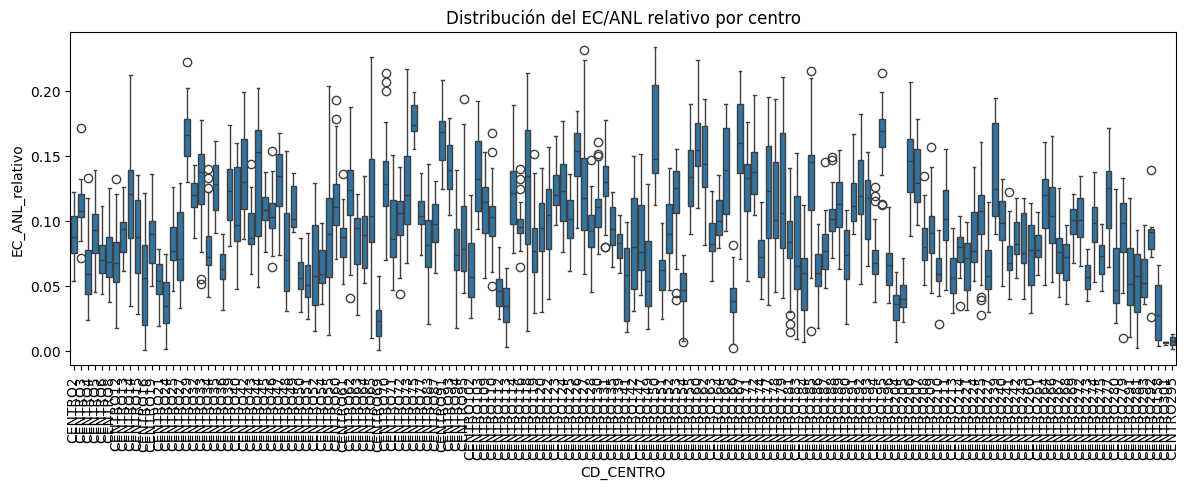

In [41]:
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="CD_CENTRO", y="EC_ANL_relativo")
plt.xticks(rotation=90)
plt.title("Distribución del EC/ANL relativo por centro")
plt.tight_layout()
plt.show()


Cada centro tiene una distribución diferente. Además aparecen bastantes outliers y hay centros en los que aparecen los valores medianos más elevados que otros, esto podría indicar problemas estructurales. También hay centros con muy baja variabilidad, que podrían actuar como referencia.
Después de ver esto habría que analizar hacer un posible clustering.

Podemos analizar también si la variable de tasa ocupación (Centros muy llenos) puede estar relacionado con el absentismo

Text(0.5, 1.0, 'Relación entre Tasa de Ocupación y EC/ANL relativo')

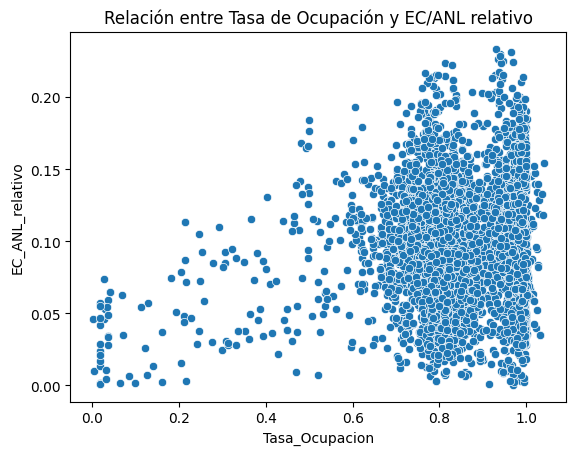

In [42]:
sns.scatterplot(data=df, x="Tasa_Ocupacion", y="EC_ANL_relativo")
plt.title("Relación entre Tasa de Ocupación y EC/ANL relativo")


No hay una relación lineal muy clara, este gráfico no nos indica que a mayor ocupación haya más absentismo. Como se puede ver, la mayoría de puntos se agrupan entre tasas de ocupación entre 0.7 a 1 y dentro de este rango el absentismo varía bastante, lo que indica que no hay una dependencia directa.

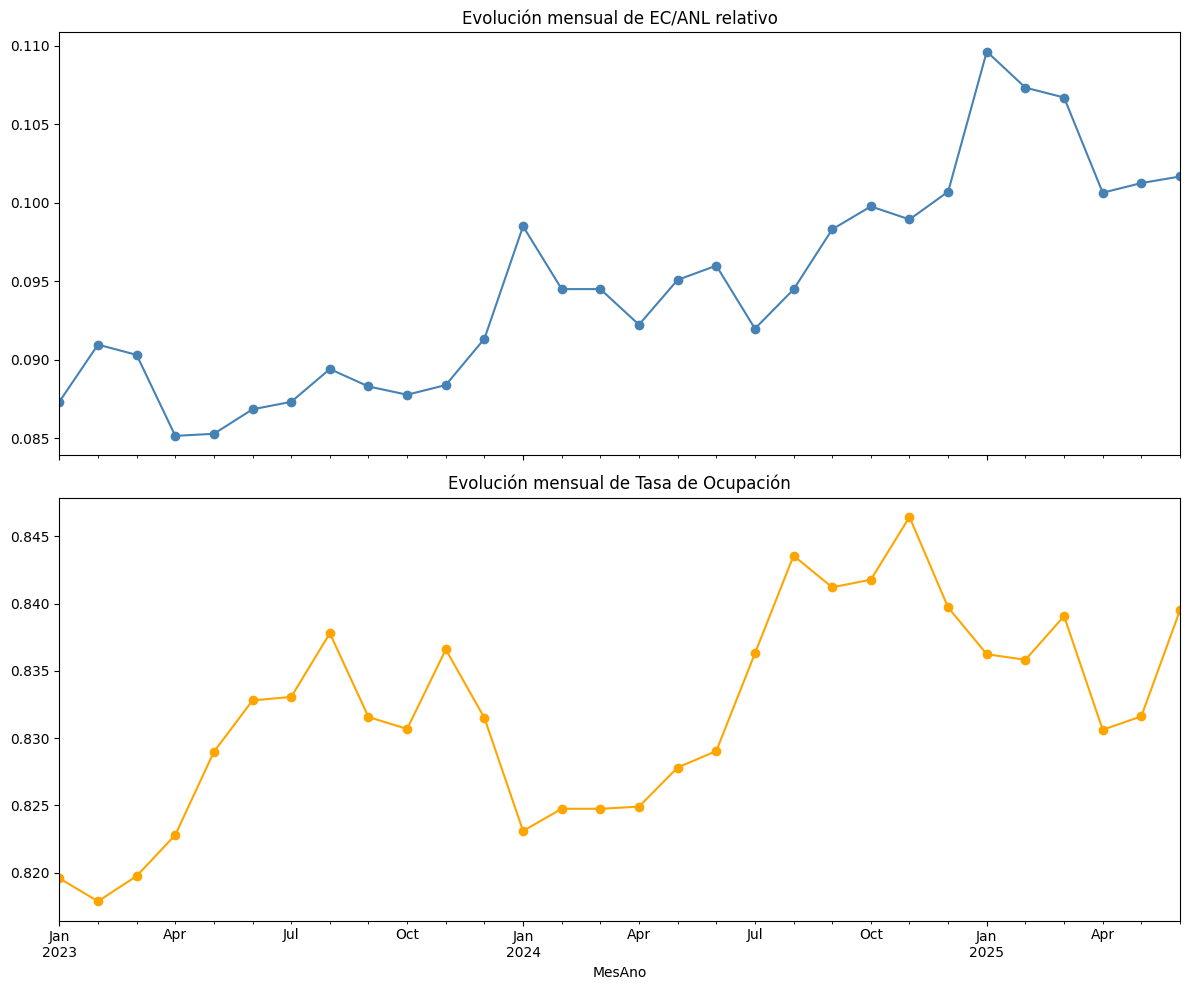

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

df.groupby("MesAno")["EC_ANL_relativo"].mean().plot(ax=axes[0], marker='o', color="steelblue")
axes[0].set_title("Evolución mensual de EC/ANL relativo")

df.groupby("MesAno")["Tasa_Ocupacion"].mean().plot(ax=axes[1], marker='o', color="orange")
axes[1].set_title("Evolución mensual de Tasa de Ocupación")

plt.tight_layout()
plt.show()


Este gráfico nos confirma que la diferencia en patrones es porque el absentismo EC/ANL podría depender de otros factores internos, más que la ocupación en sí.

Vamos a empezar a trabajar en PCA, clustering y predicción en otro Notebook.

In [50]:
# Guardamos para seguir en el siguiente Notebook
df.to_excel('/content/drive/MyDrive/TFM/ETL_analisis_centro_limpio.xlsx', index=False)
